# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
Number_of_cities = len(cities)
Number_of_cities

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#city_results = []
#Index_cities=[]

City_Number = []
City_Name = []
City_Lat = []
City_Lng = []
City_MaxTemp = []
City_Humidity = []
City_Cloudiness = []
City_WindSpeed = []
City_Country = []
City_Date = []
Count_Record = 0
#for city in cities:   

#weather_api_key= "a160fd00bbc7c7caddb54e2757ff85b2las22"
#city_ejempo=['London','Melbourne','Alaska','Jazan','Caracas','Harare','El Junquito','New Orleans',"GTY77","Maracay","Washington", "Pensilvanya", "Palita", "guarenas", "Atlanta", "Bogota"]

for city in cities:    # cities[:100]: to just do it for 100 rows (City)
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #print(url) 
    Req_weather_city = requests.get(url).json()
    if (Req_weather_city["cod"]==200):
        Count_Record = Count_Record + 1
        City_Number.append(Req_weather_city['id'])
        City_Name.append(Req_weather_city['name'])
        City_Lat.append(Req_weather_city['coord']['lat'])
        City_Lng.append(Req_weather_city['coord']['lon'])
        City_MaxTemp.append(Req_weather_city['main']['temp'])
        City_Humidity.append(Req_weather_city['main']['humidity'])
        City_Cloudiness.append(Req_weather_city['clouds']['all'])
        City_WindSpeed.append(Req_weather_city['wind']['speed'])
        City_Country.append(Req_weather_city['sys']['country'])
        City_Date.append(Req_weather_city['dt'])
        print(f"Processing Record {Count_Record} of {Number_of_cities} |City number: {Req_weather_city['id']}, City name: {Req_weather_city['name']}")
    else: 
        #{"cod":"404","message":"city not found"}
        print(f"{city}: {Req_weather_city['message']}. Skipping...")

weather_dict = {
    "City": City_Name,
    "Lat": City_Lat,
    "Lng":City_Lng,
    "Temp": City_MaxTemp,
    "Humidity":City_Humidity,
    "Cloudiness":City_Cloudiness,
    "Wind Speed":City_WindSpeed,
    "Country":City_Country,
    "Date":City_Date 
}
meteorology_cities = pd.DataFrame(weather_dict)


Processing Record 1 of 623 |City number: 5106841, City name: Albany
Processing Record 2 of 623 |City number: 5282297, City name: Bethel
Processing Record 3 of 623 |City number: 877747, City name: Mtwara
Processing Record 4 of 623 |City number: 3576994, City name: Cockburn Town
Processing Record 5 of 623 |City number: 6170031, City name: Tuktoyaktuk
manzil jamil: city not found. Skipping...
Processing Record 6 of 623 |City number: 2057087, City name: Kupang
Processing Record 7 of 623 |City number: 3372707, City name: Ribeira Grande
Processing Record 8 of 623 |City number: 3366880, City name: Hermanus
Processing Record 9 of 623 |City number: 4032243, City name: Vaini
Processing Record 10 of 623 |City number: 6255012, City name: Flinders
Processing Record 11 of 623 |City number: 1015776, City name: Bredasdorp
Processing Record 12 of 623 |City number: 315468, City name: Ergani
taolanaro: city not found. Skipping...
Processing Record 13 of 623 |City number: 4031574, City name: Provideniya
P

Processing Record 112 of 623 |City number: 690960, City name: Turka
Processing Record 113 of 623 |City number: 2355869, City name: Sapouy
Processing Record 114 of 623 |City number: 478050, City name: Ust'-Kulom
Processing Record 115 of 623 |City number: 1490256, City name: Talnakh
Processing Record 116 of 623 |City number: 5924351, City name: Clyde River
Processing Record 117 of 623 |City number: 2098329, City name: Daru
Processing Record 118 of 623 |City number: 2618795, City name: Klaksvík
Processing Record 119 of 623 |City number: 2825297, City name: Stuttgart
Processing Record 120 of 623 |City number: 778362, City name: Øksfjord
Processing Record 121 of 623 |City number: 2510407, City name: Toledo
marcona: city not found. Skipping...
Processing Record 122 of 623 |City number: 6067472, City name: Marystown
Processing Record 123 of 623 |City number: 5517675, City name: Brownfield
yanan: city not found. Skipping...
Processing Record 124 of 623 |City number: 3893629, City name: Coquimb

Processing Record 221 of 623 |City number: 2964492, City name: Dunmore East
Processing Record 222 of 623 |City number: 1067565, City name: Beloha
Processing Record 223 of 623 |City number: 5546220, City name: Saint George
Processing Record 224 of 623 |City number: 933077, City name: Shakawe
Processing Record 225 of 623 |City number: 6167817, City name: Torbay
tumannyy: city not found. Skipping...
Processing Record 226 of 623 |City number: 2746804, City name: Steenbergen
Processing Record 227 of 623 |City number: 2643044, City name: Margate
Processing Record 228 of 623 |City number: 3904906, City name: Santa Cruz de la Sierra
Processing Record 229 of 623 |City number: 2647984, City name: Great Yarmouth
Processing Record 230 of 623 |City number: 172515, City name: Abu Samrah
Processing Record 231 of 623 |City number: 2194098, City name: Ahipara
Processing Record 232 of 623 |City number: 3080102, City name: Złocieniec
Processing Record 233 of 623 |City number: 2360372, City name: Gorom-Go

Processing Record 330 of 623 |City number: 118063, City name: Sabzawār
Processing Record 331 of 623 |City number: 2026160, City name: Borogontsy
Processing Record 332 of 623 |City number: 1637001, City name: Luwuk
Processing Record 333 of 623 |City number: 2022129, City name: Kichera
Processing Record 334 of 623 |City number: 1528998, City name: Yumen
bolungarvik: city not found. Skipping...
Processing Record 335 of 623 |City number: 4255151, City name: Bud
Processing Record 336 of 623 |City number: 6137462, City name: Saint-Augustin
Processing Record 337 of 623 |City number: 1058080, City name: Nosy Varika
Processing Record 338 of 623 |City number: 533964, City name: Loukhi
Processing Record 339 of 623 |City number: 2123278, City name: Mil'kovo
Processing Record 340 of 623 |City number: 2651347, City name: Derby
Processing Record 341 of 623 |City number: 245338, City name: Am Timan
Processing Record 342 of 623 |City number: 2669047, City name: Timrå
Processing Record 343 of 623 |City 

cumaribo: city not found. Skipping...
mrirt: city not found. Skipping...
Processing Record 439 of 623 |City number: 1529651, City name: Altay
Processing Record 440 of 623 |City number: 2077895, City name: Alice Springs
barentsburg: city not found. Skipping...
Processing Record 441 of 623 |City number: 5710035, City name: West Wendover
Processing Record 442 of 623 |City number: 3448903, City name: São João da Barra
Processing Record 443 of 623 |City number: 2374583, City name: Bubaque
Processing Record 444 of 623 |City number: 3381538, City name: Grand-Santi
Processing Record 445 of 623 |City number: 1796669, City name: Sanmenxia
Processing Record 446 of 623 |City number: 1278969, City name: Along
Processing Record 447 of 623 |City number: 2269594, City name: Cascais
Processing Record 448 of 623 |City number: 2179103, City name: Whitianga
Processing Record 449 of 623 |City number: 352733, City name: Marsá Maţrūḩ
Processing Record 450 of 623 |City number: 1529484, City name: Kumul
Proces

Processing Record 547 of 623 |City number: 6942803, City name: Caraquet
Processing Record 548 of 623 |City number: 3155152, City name: Gravdal
Processing Record 549 of 623 |City number: 3893726, City name: Constitución
Processing Record 550 of 623 |City number: 107304, City name: Buraidah
Processing Record 551 of 623 |City number: 3361142, City name: Springbok
Processing Record 552 of 623 |City number: 5959326, City name: Gananoque
Processing Record 553 of 623 |City number: 1863495, City name: Gushikawa
Processing Record 554 of 623 |City number: 3163146, City name: Andenes
Processing Record 555 of 623 |City number: 3383434, City name: Nieuw Amsterdam
Processing Record 556 of 623 |City number: 4362001, City name: Mayo
Processing Record 557 of 623 |City number: 162199, City name: Annau
Processing Record 558 of 623 |City number: 1639337, City name: Kroya
Processing Record 559 of 623 |City number: 1715335, City name: Davila
Processing Record 560 of 623 |City number: 5946820, City name: Eds

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Export the city data into a .csv.
meteorology_cities.to_csv("output_data/meteorology_of_cities.csv", index=False, header=True)
# Display the DataFrame
for date_ in meteorology_cities['Date']:
    meteorology_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
meteorology_cities

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,27.79,43,1,9.22,US,02/06/2021
1,Bethel,41.3712,-73.4140,37.65,38,1,5.75,US,02/06/2021
2,Mtwara,-10.2667,40.1833,78.80,89,40,9.22,TZ,02/06/2021
3,Cockburn Town,21.4612,-71.1419,77.00,78,40,17.27,TC,02/06/2021
4,Tuktoyaktuk,69.4541,-133.0374,-16.60,76,90,24.16,CA,02/06/2021
...,...,...,...,...,...,...,...,...,...
565,Rørvik,64.8621,11.2373,23.65,92,48,9.10,NO,02/06/2021
566,Playas,-2.6333,-80.3833,78.31,78,50,11.27,EC,02/06/2021
567,Jackson,42.4165,-122.8345,47.95,61,1,0.96,US,02/06/2021
568,Kysyl-Syr,63.8986,122.7617,-34.37,82,59,7.52,RU,02/06/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
Weather_cities_statistic = meteorology_cities.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Weather_cities_statistic

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,21.029240,19.561054,48.106211,72.963158,49.408772,8.061982
std,33.209423,90.129841,32.766484,20.170897,39.024569,5.906630
min,-54.800000,-179.166700,-41.350000,1.000000,0.000000,0.450000
25%,-7.145275,-60.089025,27.040000,63.000000,8.250000,3.440000
50%,25.609900,21.649100,59.160000,78.000000,44.500000,6.890000
75%,49.351050,101.990025,74.870000,87.000000,90.000000,11.500000
max,78.218600,179.316700,89.600000,100.000000,100.000000,37.980000


In [15]:
#  Get the indices of cities that have humidity over 100%
#city_Hum100 =  meteorology_cities.index[meteorology_cities['Humidity'] > 100 ].tolist()
city_Hum100 = meteorology_cities[(meteorology_cities['Humidity'] > 100)]
if len(city_Hum100) == 0:
    clean_city_data = meteorology_cities.copy()
    print(f"Skip this step if there are no cities that have humidity > 100%.")
    print(city_Hum100.index)
else:
    clean_city_data = meteorology_cities[(meteorology_cities['Humidity'] <= 100)]
    clean_city_data_statistic = clean_city_data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
    print(f"Indices of cities that have humidity over 100%.: {city_Hum100.index}")
    print(f"=========================================================================")
    print(f"{clean_city_data_statistic}")

Skip this step if there are no cities that have humidity > 100%.
Int64Index([], dtype='int64')


In [16]:
#which we call "clean_city_data"
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,27.79,43,1,9.22,US,02/06/2021
1,Bethel,41.3712,-73.4140,37.65,38,1,5.75,US,02/06/2021
2,Mtwara,-10.2667,40.1833,78.80,89,40,9.22,TZ,02/06/2021
3,Cockburn Town,21.4612,-71.1419,77.00,78,40,17.27,TC,02/06/2021
4,Tuktoyaktuk,69.4541,-133.0374,-16.60,76,90,24.16,CA,02/06/2021
...,...,...,...,...,...,...,...,...,...
565,Rørvik,64.8621,11.2373,23.65,92,48,9.10,NO,02/06/2021
566,Playas,-2.6333,-80.3833,78.31,78,50,11.27,EC,02/06/2021
567,Jackson,42.4165,-122.8345,47.95,61,1,0.96,US,02/06/2021
568,Kysyl-Syr,63.8986,122.7617,-34.37,82,59,7.52,RU,02/06/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

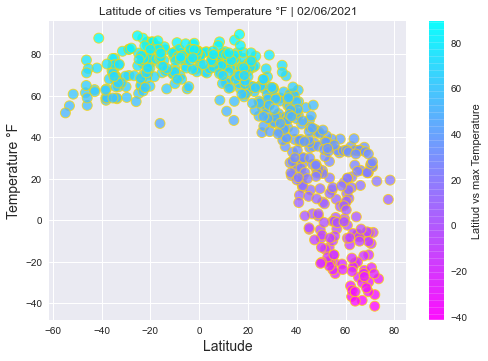

In [17]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Temp']
ratio = clean_city_data['Temp'] #[1, 0.53, 2, 0.76, 0.5, 2.125, 0.56, 1.28, 1.09, 1.02]
plt.scatter(x, y, s=100, c=ratio, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Temperature °F", fontsize="14")
cbar = plt.colorbar()
cbar.set_label('Latitud vs max Temperature')
plt.savefig("output_data/Fig1_Lat_vs_Tem.png")

## Latitude vs. Humidity Plot

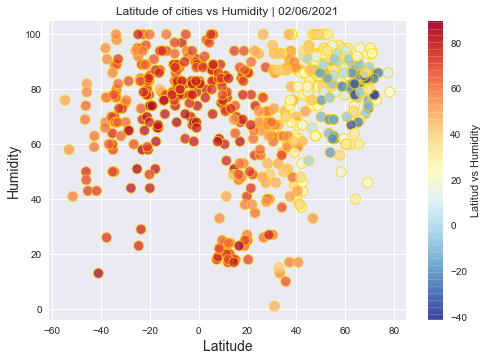

In [18]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
plt.scatter(x, y, s=100, c=ratio, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Humidity | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Humidity", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Humidity')
plt.savefig("output_data/Fig2_Lat_vs_Hum.png")

## Latitude vs. Cloudiness Plot

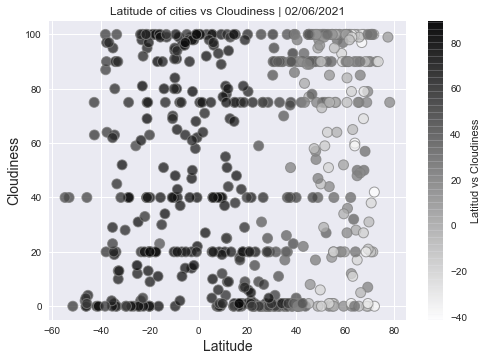

In [19]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
plt.scatter(x, y, s=100, c=ratio, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Cloudiness | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Cloudiness", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Cloudiness')
plt.savefig("output_data/Fig3_Lat_vs_Clou.png")

## Latitude vs. Wind Speed Plot

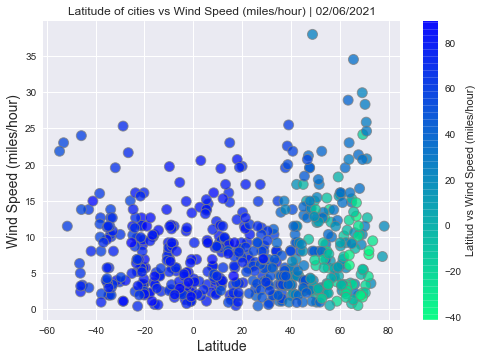

In [25]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
plt.scatter(x, y, s=100, c=ratio, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Wind Speed (miles/hour)", fontsize="14")
cbar = plt.colorbar()
cbar.set_label(f"Latitud vs Wind Speed (miles/hour)")
plt.savefig("output_data/Fig4_Lat_vs_WS.png")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

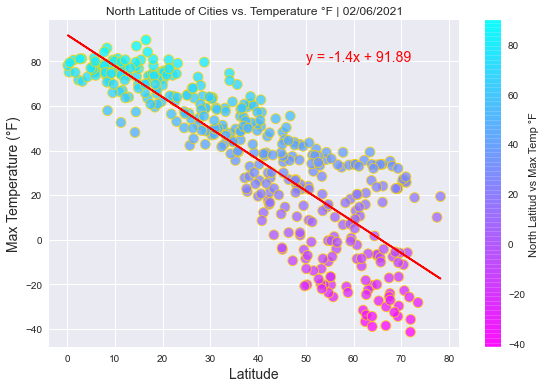

the intercept :91.895
correlation:-0.847
Lat linear regression model :y = -1.4x + 91.89
 I observe that both variables have a very high inverse (negative) correlation based on the value: -0.847, that is -84.7%, which indicates that are inversely proportional, as long as the Latitude decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.


In [30]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Temp']
ratio_Northern = Northern_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,80),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Max Temp °F')
plt.savefig("output_data/Fig5_North_Lat_vs_temp_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"===============================================")
print(f" I observe that both variables have a very high inverse (negative) correlation \
based on the value: {correlation_North}, that is {round(correlation_North*100,2)}%, which \
indicates that are inversely proportional, as long as the Latitude \
decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

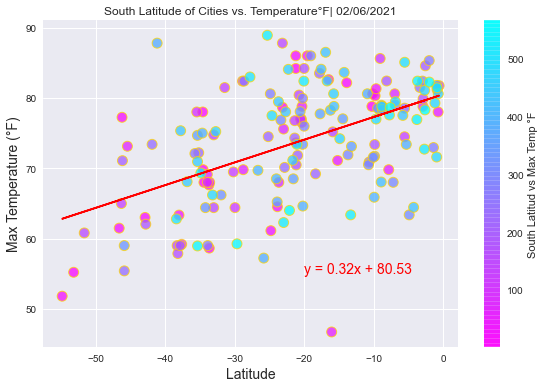

the intercept :80.53
correlation:0.52
Lat linear regression model :y = 0.32x + 80.53
There is a very high correlation based on the value 0.52, that is: 52.0%, which indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), the Temeprature °F also increases, in the same proportion.


In [33]:
# Southern Hemisphere = Latitude between 0 ° and -90 °: Southern Hemisphere
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Temp']
ratio_Southern = Southern_city_data['Temp'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,55),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Temperature°F| {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Max Temp °F')
plt.savefig("output_data/Fig6_South_Lat_vs_temp_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is a very high correlation based on the value {correlation_South}, that is: {round(correlation_South*100,2)}%, which \
indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), \
the Temeprature °F also increases, in the same proportion.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

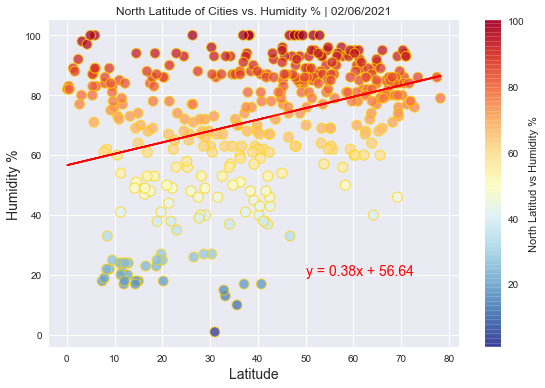

the intercept :56.64
correlation:0.351
Lat linear regression model :y = 0.38x + 56.64
There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, the correlation value is 35.1%, although it is positive, it does not show a trend between both variables


In [34]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Humidity']
ratio_Northern = Northern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Humidity %')
plt.savefig("output_data/Fig7_North_Lat_vs_Hum_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"=============================================")
print(f"There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive, it does not show a trend between both variables")
  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

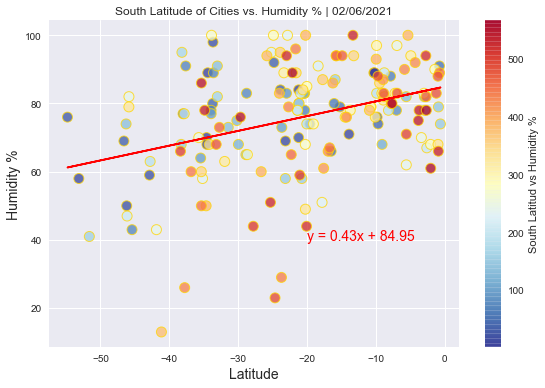

the intercept :84.946
correlation:0.37
Lat linear regression model :y = 0.43x + 84.95
There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, the correlation value is 37.0%, although it is positive, it does not show a trend between both variables


In [36]:
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Humidity']
ratio_Southern = Southern_city_data['Humidity'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Humidity %')
plt.savefig("output_data/Fig8_South_Lat_vs_Hum_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive, it does not show a trend between both variables")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

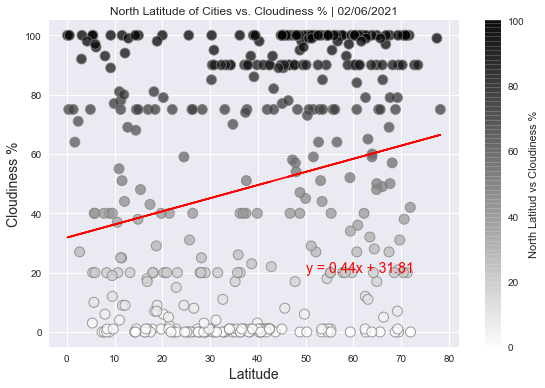

the intercept :31.81
correlation:0.223
Lat linear regression model :y = 0.44x + 31.81
There is an absence of correlation (no correlation) between Latitude and Cloudiness %, the correlation value is 22.3%, although it is positive


In [37]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Cloudiness']
ratio_Northern = Northern_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Cloudiness %')
plt.savefig("output_data/Fig9_North_Lat_vs_Clo_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")
print(f"There is an absence of correlation (no correlation) between Latitude and Cloudiness %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

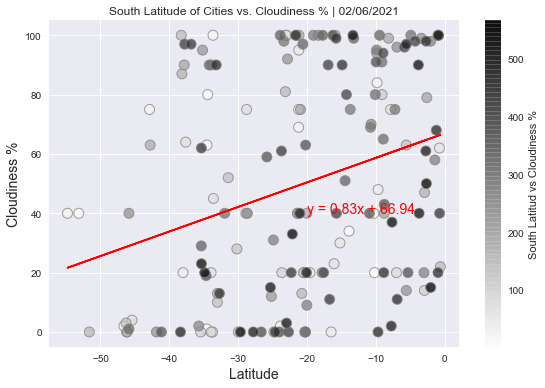

the intercept :66.942
correlation:0.3
Lat linear regression model :y = 0.83x + 66.94
There is no correlation between Latitude and Cloudiness %, the correlation value is 30.0%, although it is positive


In [38]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Cloudiness']
ratio_Southern = Southern_city_data['Cloudiness'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Cloudiness %')
plt.savefig("output_data/Fig10_South_Lat_vs_Clo_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is no correlation between Latitude and Cloudiness %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

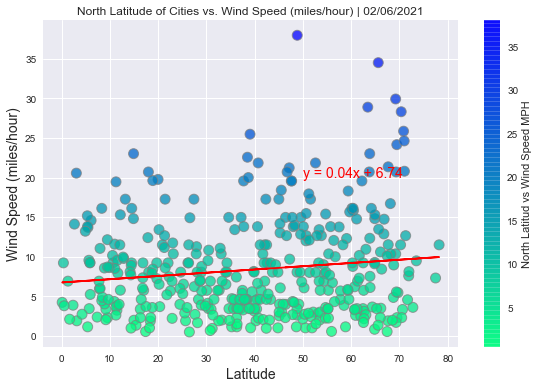

the intercept :6.74
correlation:0.133
Lat linear regression model :y = 0.04x + 6.74


In [39]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Wind Speed']
ratio_Northern = Northern_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed (miles/hour)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Wind Speed MPH')
plt.savefig("output_data/Fig11_North_Lat_vs_WS_reg.png")
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")
 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

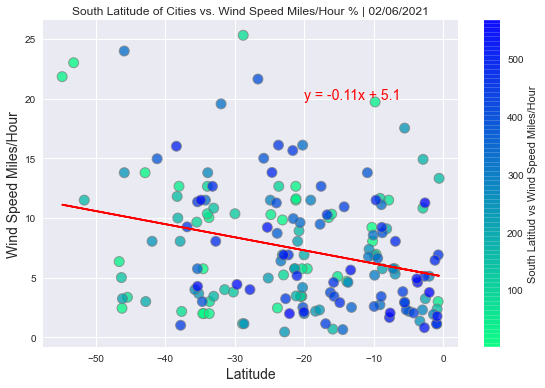

the intercept :5.096
correlation:-0.28
Lat linear regression model :y = -0.11x + 5.1


In [40]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Wind Speed']
ratio_Southern = Southern_city_data['Wind Speed'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,20),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Wind Speed Miles/Hour % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed Miles/Hour", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Wind Speed Miles/Hour')
plt.savefig("output_data/Fig12_South_Lat_vs_WS_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
 